Exponential Smoothing Methods ***Vs*** ETS_Models

In [1]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 54.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.

**Importing Neccessary Libraries**

In [50]:
## importing Neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams['axes.facecolor']="#DCDCDC"
plt.rcParams['font.family'] = 'Liberation Sans'
plt.rcParams['font.size']=14
import warnings
warnings.filterwarnings("ignore")
from rich.console import Console
console = Console()

**Loading Airline Passengers Data**

In [51]:
## loading the data
data = pd.read_csv("/content/airline_passengers.csv")
## checking the first five rows
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [52]:
## setting the Month columns as my Index
data.set_index("Month",inplace=True)
## checking the Index
data.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

Ensuring that our data index is in correct datetime format and we also should specify periodicity

In [53]:
data.index = pd.to_datetime(data.index).to_period('M')
data.index

PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
             '1949-07', '1949-08', '1949-09', '1949-10',
             ...
             '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
             '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', name='Month', length=144)

plotting the Time Series Data

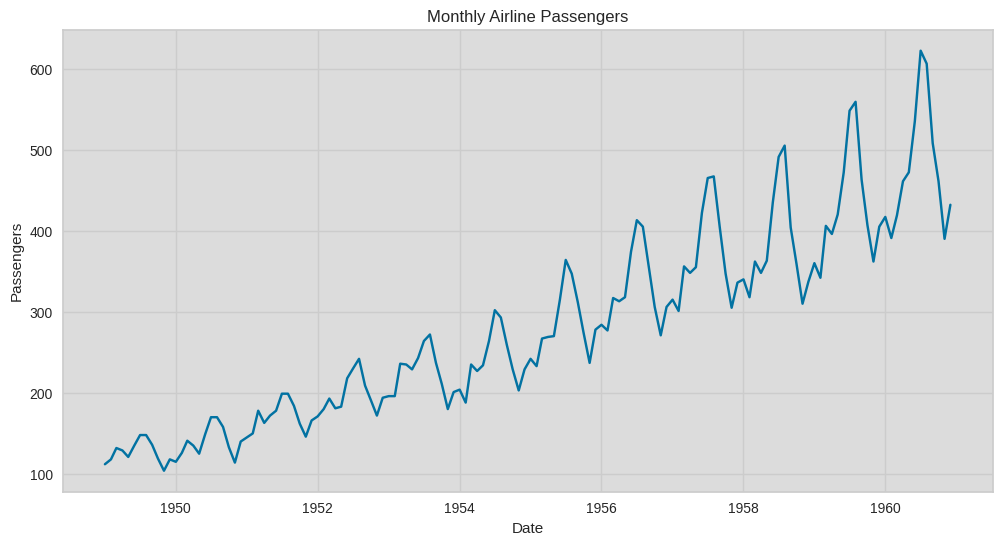

In [54]:
plt.figure(figsize=(12,6))
plt.plot(data.index.to_timestamp(), data['Passengers'],label='Passengers')
plt.title("Monthly Airline Passengers",loc='center')
plt.ylabel("Passengers")
plt.xlabel("Date")
plt.show()

**Explorative Data Analysis**

In [55]:
## checking for missing values in the data
console.print("Missing Values in the data\n",style='bold underline')
print(f"Number of Missing Values in the data are: {data.isnull().sum().sum()}")

Missing Values in the data

Number of Missing Values in the data are: 0


In [56]:
## checking for general info
console.print("General Info\n",style='bold underline')
print(data.info())


General Info

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 144 entries, 1949-01 to 1960-12
Freq: M
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None


In [57]:
## checking for descriptive stats
console.print("Data Descriptive Statistics\n",style='bold underline')
print(data.describe().T)

Data Descriptive Statistics

            count        mean         std    min    25%    50%    75%    max
Passengers  144.0  280.298611  119.966317  104.0  180.0  265.5  360.5  622.0


**Time Series In pycaret**

In [58]:
## importing all the modules going to be used
from pycaret.time_series import *

In [62]:
## intializing an Instance of the TimeseriesForecasting Experiment
exp = TSForecastingExperiment()
## setting up the time seris data
exp.setup(data , target='Passengers',fh=12 , coverage= 0.95)
## fh-- Means our Holdout Period the or Test Data or Data kept aside for Evaluation
## Coverage--Help full as represent Confidence Level , we set it to 95 % confidence Level

,Description,Value
0,session_id,4799
1,Target,Passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


What Deos the Description Tell Us:
- Our Target Variable is ovious Passengers
- We are applying a Univariate Time Series
- Train shape is (132, 1)
- Test shape is (12,1)
- Primarily Seasonality = 12
- Seasonality Present in data = True
- No Negative Values in Data
- Seaasonal Type is Multiplicative
- Target is simply doesnot look like white Noise
- Significant Seasonal Periods are = [12, 24, 36, 11, 48]
- They very Many others

**The check stats Function**

In [60]:
exp.check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,144.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,280.298611
3,Summary,Statistics,Transformed,Median,,265.5
4,Summary,Statistics,Transformed,Standard Deviation,,119.966317
5,Summary,Statistics,Transformed,Variance,,14391.917201
6,Summary,Statistics,Transformed,Kurtosis,,-0.364942
7,Summary,Statistics,Transformed,Skewness,,0.58316
8,Summary,Statistics,Transformed,# Distinct Values,,118.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",1606.083817


**Statistics Obtained**
- Augumnented Dickey Fuller Test says the Data is Simply Non Stationary with a P value of **0.99188** , meaning we fail to Reject our Null hypothesis that our data is Non-Stationary.
- The second Test is Normality of our underlying Distribution , the Shapiro Wilk Test is saying our data is not Normally Distributed  with a p value of **0.000068** meaning we have enough evidence to reject our Null hypothesis which is , Sample data comes from a Normally Distributed Population.
- Then Ljung-Box is used to test if Autocorrelation Exists in the data , the p value is **0.0** for given numbers of lags K meaning we reject our Null hypothesis The Autocorrelation of lags to a given lag (K) is 0.

**Plotting some plots using the Plot Model Module**

In [64]:
## ploting out train andd test data
exp.plot_model(plot='train_test_split')

**plotting ACF**

In [65]:
## plotting thee Acf
exp.plot_model(plot ='acf',data_kwargs=dict(nlags=40))

What does ACF tell me:
- ACF simplify is a statiscal tool use to measure the correlation between a time series and its lagged Values  
- So the First point with correlation 1 is our curreent time series data, because it has a correlaton of 1 , the rest are its previous data
- In simple words its telling me  My time series has strong correlation withs its Previous Values

**PACF Plot**
- PACF same as ACF is a statiscal tool , that measures the auto corraltion of a time series but PACF controls the effect of Intermediate lags
- In simple words is gives us the True Relationship between a time series and a given lag value

In [67]:
## plotting PACF
exp.plot_model(plot='pacf',data_kwargs=dict(nlags=40))

What PACF is telling Me:
- if I control for Intermediate lags , so the Time series has a strong correlation withs its firts lag with a correlation coefficient of 0.95 , then followed by lag 9 with correlation coefficient of 0.28
- In simple words , there is aint too much correlation between lags and its time series as ACF told us

Decomposition Plot

In [68]:
## Additive model
exp.plot_model(plot='decomp', data_kwargs=dict(type='add'))

What is the plot telling me:
- The plot has basically decomposed the Time series into its core componets Trend , Seasonal and Residual
- Additive simply Means my componets  are added
-  The Residuals still show me some signs of seasonality though , meaning it doesnot look like white Noise

**Multiplcative decomp**

In [69]:
exp.plot_model(plot='decomp',data_kwargs=dict(type='mul'))

Whats is Multiplicative Model Telling Me.
- Multiplicative Simply means that my components are multiplied together
- its useful if the data has non-linear Patterns as it captures those patterns
- if you see the Residual , its a bitt better than my residual of the additive , it has tried some how , though still , i see some seasonality , may be if we apply seasonal differencing to capture that seasonality we shall be good to go
- The variance also is icreasing a little bit , applying Box cox transformation could help

Exponentila Smoothing Methods
- these  are simply decomposed methods , meaning that they shine best if the data patterns follow the attributes each method requires or appeals in hand.

**Availabel Forecasting Models in pycaret**

In [71]:
exp.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend._polynomial_trend_for...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


**Simple Exponential Method (SES)**:
**Assumptions of this model**:
- it Assumes that it will shine if the data has Trend
- it also assumes it will shine if the data has no seasonality

In [70]:
## intialize the method
ses = exp.create_model('exp_smooth',trend=None,seasonal=None,sp=None,cross_validation=False)


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.5006,2.9849,76.1426,103.1245,0.1428,0.1616,-0.9198


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Results of the ses**
- We can see how out first method is performing , lets look at our pivotal metrics [MAPE,MASE,RMSE]:
- its telling me , that our method ses , on average makes an error of 14.2%  which is too huge (MAPE=Mean Absolute Percentage Error)
- Then if we consider (MASE=Mean Absolute Scaled Error) ,its telling me that my method performs 2.5 times worse than a simple bench Mark like Naive

Why bad Results:
- Its not suprising of the Results because our SES doesnot appreciate stationarity and trend in data , its simpy good for data that is flat.

In [72]:
##getting the parameters
ses.get_params()


{'damped_trend': False,
 'damping_trend': None,
 'initial_level': None,
 'initial_seasonal': None,
 'initial_trend': None,
 'initialization_method': 'estimated',
 'method': None,
 'minimize_kwargs': None,
 'optimized': True,
 'random_state': None,
 'remove_bias': False,
 'seasonal': None,
 'smoothing_level': None,
 'smoothing_seasonal': None,
 'smoothing_trend': None,
 'sp': None,
 'start_params': None,
 'trend': None,
 'use_boxcox': None,
 'use_brute': True}

**Insample Predictions**(Train set)

In [73]:
exp.plot_model(ses , plot='insample', data_kwargs=dict(lables=['SES']))

In [74]:
## Insample data index was
data.index[:-12]

PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
             '1949-07', '1949-08', '1949-09', '1949-10',
             ...
             '1959-03', '1959-04', '1959-05', '1959-06', '1959-07', '1959-08',
             '1959-09', '1959-10', '1959-11', '1959-12'],
            dtype='period[M]', name='Month', length=132)

lets plot the Residuals of the Train data

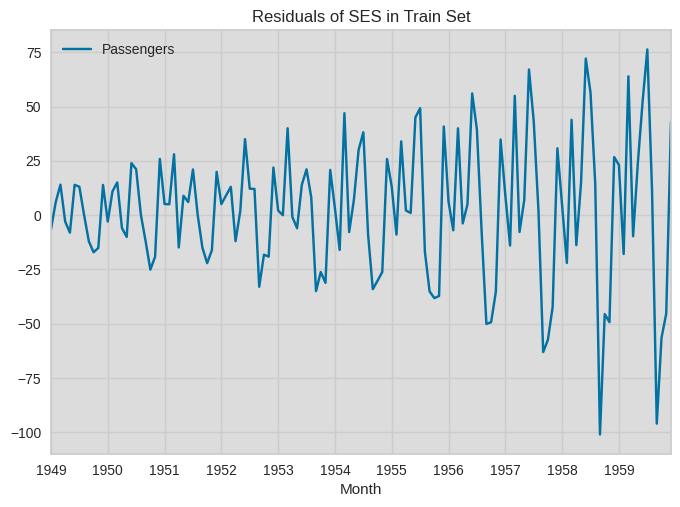

In [77]:
## plotting the residuals of the trrain test
resid = ses.predict_residuals(data[:-12])
resid.plot()
plt.title("Residuals of SES in Train Set")
plt.show()

Whats Wrong with the train residuals:
- The Residuals in the Train set is Not good Residual because it does not look like White Noisee
- So the Residual looked like White Noise , it Would Mean that the Model Captured Everything the Model Requires To.
- But our Case we see increasing Variance, Seasonality
- So its a strong Signal we dont have a good model in the Train set


Getting the Predictions of the Insample data

In [79]:
## Train Predictions
y_pred_train = ses.predict(data.index[:-12])
y_pred_train


,Passengers
Month,
1949-01,118.466667
1949-02,112.032333
1949-03,117.970162
1949-04,131.929851
1949-05,129.014649
...,...
1959-08,547.618697
1959-09,558.943093
1959-10,463.479715


**Creating A Custom Function for Evaluation Metrics**

In [91]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , root_mean_squared_error , r2_score
## define the function
def ts_metrics(y , y_hat,title=''):
  mae = mean_absolute_error(y,y_hat)
  mape= mean_absolute_percentage_error(y,y_hat)
  rmse = root_mean_squared_error(y,y_hat)
  r2 = r2_score(y,y_hat)

  metrics = {
      "Mean_Absolute_Error":mae,
      "Mean_Absolute_Perceentage_Error":mape,
      "Root_Mean_Squared_Error":rmse,
      "R_Squared":r2
  }

  console.print(f"{title}:\n",style="bold underline")
  print(f"The Mean Absolute Error is = {mae:.2f}")
  print(f"The Mean Absolute Percentage Error is = {mape:.2%}")
  print(f"The Root Mean Squared Error is = {rmse:2f}")
  print(f"The R Squared is = {r2:.2%}")

  return



In [92]:
## calling the function
ts_metrics(data[:-12], y_pred_train,'Time Series Evaluation Metrics in The Train Set')

Time Series Evaluation Metrics in The Train Set:

The Mean Absolute Error is = 23.98
The Mean Absolute Percentage Error is = 8.97%
The Root Mean Squared Error is = 31.263639
The R Squared is = 91.34%


Insample Results Performance
- We can see that the insample Results of the the Train data are so bad
- This is because our model cannot handle search type of data
- Please lets take Note of R Squared , its Misleading and we shouldnot evaluate the model based on it

**Making Some Forecasts**

In [83]:
## forecast on the test set
exp.plot_model(ses , plot='forecast',data_kwargs= dict(labels=['SES']))

**forecasting into the Future**

In [85]:
## forecasting into the future
exp.plot_model(ses,plot='forecast',data_kwargs= dict(fh=38,labels=['SES']))

What the Graph is Telling Me:
- I have just Made a forecast 38 months into the future and we probably see that thee forecast is really different

In [87]:
## we can also use the manual method to predict to make predictions also they are also built in functions in pycaret like predict model
## test data
data.index[-12:] # test data
## those are my last 12 observations
y_pred_test = ses.predict(data.index[-12:])
y_pred_test

,Passengers
1960-01,404.786132
1960-02,404.786132
1960-03,404.786132
1960-04,404.786132
1960-05,404.786132
1960-06,404.786132
1960-07,404.786132
1960-08,404.786132
1960-09,404.786132
1960-10,404.786132


In [88]:
## we could also have used
ses.predict()

,Passengers
1960-01,404.786132
1960-02,404.786132
1960-03,404.786132
1960-04,404.786132
1960-05,404.786132
1960-06,404.786132
1960-07,404.786132
1960-08,404.786132
1960-09,404.786132
1960-10,404.786132


In [93]:
## calling out the function
ts_metrics(data[-12:],y_pred_test,'Time Series Evaluation Metrics in The Test Set')

Time Series Evaluation Metrics in The Test Set:

The Mean Absolute Error is = 76.14
The Mean Absolute Percentage Error is = 14.28%
The Root Mean Squared Error is = 103.124454
The R Squared is = -91.98%


In [94]:
## Example of An built in Function
exp.predict_model(ses , fh=12)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Exponential Smoothing,2.5006,2.9849,76.1426,103.1245,0.1428,0.1616,-0.9198


,y_pred
1960-01,404.7861
1960-02,404.7861
1960-03,404.7861
1960-04,404.7861
1960-05,404.7861
1960-06,404.7861
1960-07,404.7861
1960-08,404.7861
1960-09,404.7861
1960-10,404.7861


**Holts Linear Trend**:Data assumptions
- The data has a linear Trend
- The data has No seasonality

In [96]:
## crrreating an instance of the Holts linear Trend
ht = exp.create_model('exp_smooth',trend='add',seasonal=None,sp=None,cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.2069,2.7073,67.2002,93.5338,0.1259,0.1402,-0.5793


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [100]:
## making forecast
exp.plot_model(ht , plot='forecast',data_kwargs=dict(labels=['Holts linear Trend'],fh=24))

Extracting Predictions for the 24 Months into the Future:

In [101]:
exp.predict_model(ht , fh=24)

,y_pred
1960-01,406.8585
1960-02,408.9205
1960-03,410.9826
1960-04,413.0446
1960-05,415.1066
1960-06,417.1687
1960-07,419.2307
1960-08,421.2927
1960-09,423.3547
1960-10,425.4168


Short Notes:
- hey can observe that holts some doing better than the ses , cause if we look at the MAPE ,there was some slight decline , this because Holts Linear Trend apppreciates Trend in the data but doesnot appreciate seasonality

**Holts Winter Method**: Data Assumptions
- it assumes that data has a trend
- it takes into account also seasonality

In [102]:
## holts winter addditive components
hw_add = exp.create_model('exp_smooth',trend='add',seasonal='add',sp=12,cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.4394,0.4915,13.3805,16.9799,0.0280,0.0280,0.9480


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [103]:
## holts winter with multiplicative seasonality
hw_mult = exp.create_model('exp_smooth',trend='add',seasonal='mul',sp=12,cross_validation=False)


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.3382,0.4575,10.2997,15.8074,0.0221,0.0216,0.9549


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [104]:
## holts winter with damped Trend  and multiplicative seasonality
hw_damped_trend = exp.create_model('exp_smooth',trend='add',seasonal='mul',sp=12,cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.3382,0.4575,10.2997,15.8074,0.0221,0.0216,0.9549


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [105]:
## If you want to get the Parameters for Each model
hw_mult.get_params()

{'damped_trend': False,
 'damping_trend': None,
 'initial_level': None,
 'initial_seasonal': None,
 'initial_trend': None,
 'initialization_method': 'estimated',
 'method': None,
 'minimize_kwargs': None,
 'optimized': True,
 'random_state': None,
 'remove_bias': False,
 'seasonal': 'mul',
 'smoothing_level': None,
 'smoothing_seasonal': None,
 'smoothing_trend': None,
 'sp': 12,
 'start_params': None,
 'trend': 'add',
 'use_boxcox': None,
 'use_brute': True}

Plotting All Methods:

In [106]:
## plotting all the methods focusing on the Train data
exp.plot_model([ses,ht,hw_add,hw_mult,hw_damped_trend],plot='insample',data_kwargs= dict(labels=['SES','Holts Linear Trend','Holts Winter','Holts Winter(mult seasonal)','Holts Winter damped Trend']))

In [107]:
## plotting all the methods focusing on the test data
exp.plot_model([ses,ht,hw_add,hw_mult,hw_damped_trend],plot='forecast',data_kwargs= dict(labels=['SES','Holts Linear Trend','Holts Winter','Holts Winter(mult seasonal)','Holts Winter damped Trend']))

In [110]:
## future forecast 36 months into the future
exp.plot_model([ses,ht,hw_add,hw_mult,hw_damped_trend],plot='forecast',data_kwargs= dict(fh=38,labels=['SES','Holts Linear Trend','Holts Winter','Holts Winter(mult seasonal)','Holts Winter damped Trend']))

**Which Models Performs Best:**

In [111]:
exp.compare_models(include=[ses,ht,hw_add,hw_mult,hw_damped_trend],cross_validation=False)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
3,Exponential Smoothing,0.3382,0.4575,10.2997,15.8074,0.0221,0.0216,0.9549,0.1600
4,Exponential Smoothing,0.3382,0.4575,10.2997,15.8074,0.0221,0.0216,0.9549,0.1600
2,Exponential Smoothing,0.4394,0.4915,13.3805,16.9799,0.0280,0.0280,0.9480,0.1200
1,Exponential Smoothing,2.2069,2.7073,67.2002,93.5338,0.1259,0.1402,-0.5793,0.0400
0,Exponential Smoothing,2.5006,2.9849,76.1426,103.1245,0.1428,0.1616,-0.9198,0.0300


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

ExponentialSmoothing(seasonal='mul', sp=12, trend='add')

Best Performing Method:  
- Exponential Smoothing of Index 3 which is my Holts Winter Multiplicative is the best Perorming with MAPE OF 2.2% meaning on avaerage , it makes an Error of 2%.
- it Performed Well because of the data attributes , it accounts for trend and multiplicative seasonality

**Diagnostics of the Model (MODEL RESIDUALS)**
- Residuals of the best performing Model

In [113]:
exp.plot_model(hw_mult , plot="diagnostics")

What We can See:
- We can see that the Residual looks slightly like WhiteNoise
- Distribution looks like from a Normmal Distribution

**ETS MODELS** **(Error ,Trend ,Seasonality)**
- ETS , stands for Error , Trend and Seasonality
- its Similar to Exponential Smoothing Methods in a way that the point Forecasts is the Same
- What makes ETS models different is that it accounts the error componet after making an assumption that it coms from a normal distribution , and from that assumption it can be able to **create point forecast intervals**
- So Point Intervals is the only thing  that separates the Two ETS and Exponential Smoothing Methods
- But Everything is ths Same

**NOTE**:They are 18 of the kind of ETS MODELS

In [115]:
## so the first one is  ETS(Additive Error , No Trend , No Seanolatly)
ets_ANN = exp.create_model('ets',error='add',trend=None ,seasonal=None, sp=None, cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.4960,2.9807,76.0029,102.9795,0.1425,0.1612,-0.9144


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [118]:
## ETS (Additive Error , Addittive Trend , No Seasonality)
ets_AAN = exp.create_model('ets',error='add',trend='add',seasonal=None,sp=None,cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,2.1789,2.6833,66.3466,92.7039,0.1243,0.1382,-0.5514


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [119]:
## ETS(Additive Eror,Additive Trend ,Multiplicative Seasonality)
ets_AAM = exp.create_model('ets',error='add',trend='add',seasonal='mul',sp=12,cross_validation=False)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.3129,0.4475,9.5287,15.4598,0.0203,0.0199,0.9569


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Comparing the Best Performing ETS Model

In [120]:
exp.compare_models(include=[ets_AAM,ets_AAN,ets_ANN],cross_validation=False)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
0,ETS,0.3129,0.4475,9.5287,15.4598,0.0203,0.0199,0.9569,0.1500
1,ETS,2.1789,2.6833,66.3466,92.7039,0.1243,0.1382,-0.5514,0.0500
2,ETS,2.4960,2.9807,76.0029,102.9795,0.1425,0.1612,-0.9144,0.0500


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

AutoETS(seasonal='mul', sp=12, trend='add')

* Best is Index 0 which is ETS(AAM)

Plotting Insample Performance of ETS(AAM)

In [123]:
exp.plot_model(ets_AAM, plot='insample',data_kwargs=dict(labels=['ETS(A,A,M)']))

**Performance in the Test Data**

In [124]:
exp.plot_model(ets_AAM, plot='forecast',data_kwargs=dict(labels=['ETS(A,A,M)']))

FUTURE forecats by ETS(A,A,M)

In [125]:
exp.plot_model(ets_AAM, plot='forecast',data_kwargs=dict(fh=48,labels=['ETS(A,A,M)']))

**Comparing All models future forecasts**

In [126]:
exp.plot_model([ets_AAM,ets_AAN,ets_ANN], plot='forecast',data_kwargs=dict(fh=48,labels=['ETS(A,A,M)','ETS(A,A,N)','ETS(A,N,N)']))

**Residuals OF ETS(A,A,M)**

In [127]:
exp.plot_model(ets_AAM, plot='diagnostics')

**Summary of ETS(A,A,M)**

In [128]:
ets_AAM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:                       ETS(AAM)   Log Likelihood                -488.626
Date:                Tue, 14 Jan 2025   AIC                           1013.253
Time:                        16:20:33   BIC                           1065.143
Sample:                    01-31-1949   HQIC                          1034.339
                         - 12-31-1959   Scale                           96.116
Covariance Type:               approx                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.3734      0.067      5.551      0.000       0.242       0.505
smoothing_trend      3.734e-05        nan        nan        nan         nan         nan
smoothing_seasonal      0.6266      0.067      9.296      0.000       0.494       0.759
initial_level         109.3480        nan        nan        nan         nan         nan
initial_trend           2.6556        nan        nan        nan         nan         nan
initial_seasonal.0      0.9773        nan        nan        nan         nan         nan
initial_seasonal.1      0.8482        nan        nan        nan         nan         nan
initial_seasonal.2      0.9508        nan        nan        nan         nan         nan
initial_seasonal.3      1.0885        nan        nan        nan         nan         nan
initial_seasonal.4      1.1927        nan        nan        nan         nan         nan
initial_seasonal.5      1.2076        nan        nan        nan         nan         nan
initial_seasonal.6      1.1092        nan        nan        nan         nan         nan
initial_seasonal.7      1.0129        nan        nan        nan         nan         nan
initial_seasonal.8      1.0969        nan        nan        nan         nan         nan
initial_seasonal.9      1.1541        nan        nan        nan         nan         nan
initial_seasonal.10     1.0517        nan        nan        nan         nan         nan
initial_seasonal.11     1.0000        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (Q):                       41.34   Jarque-Bera (JB):                 1.25
Prob(Q):                              0.02   Prob(JB):                         0.54
Heteroskedasticity (H):               2.21   Skew:                             0.11
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

**BENCH MARKS**

In [129]:
## Naive
exp.create_model("naive")

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,2.1716,2.5501,63.4167,83.4740,0.1549,0.1766,-1.2681
1,1957-12,1.7118,2.2514,52.3333,76.4341,0.1205,0.1351,-0.5305
2,1958-12,3.1964,3.4821,91.3333,113.1886,0.1954,0.2259,-1.8662
Mean,NaT,2.3599,2.7612,69.0278,91.0322,0.1569,0.1792,-1.2216
SD,NaT,0.6205,0.5241,16.4086,15.9284,0.0306,0.0371,0.5463


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

NaiveForecaster()

In [130]:
## Seasonal Nave
exp.create_model("snaive")

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,1.3755,1.2671,40.1667,41.4749,0.1076,0.1138,0.4401
1,1957-12,0.4116,0.5011,12.5833,17.0123,0.0314,0.0322,0.9242
2,1958-12,1.6565,1.5152,47.3333,49.2544,0.1106,0.1176,0.4573
Mean,NaT,1.1479,1.0945,33.3611,35.9139,0.0832,0.0879,0.6072
SD,NaT,0.5331,0.4316,14.9806,13.7376,0.0367,0.0394,0.2243


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

NaiveForecaster(sp=12)

**Hold out predictions**

In [132]:
Houldout_pred = exp.predict_model(ets_AAM)
Houldout_pred

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ETS,0.3129,0.4475,9.5287,15.4598,0.0203,0.0199,0.9569


,y_pred
1960-01,417.2261
1960-02,394.0013
1960-03,462.2043
1960-04,448.3359
1960-05,471.6357
1960-06,539.3344
1960-07,623.5598
1960-08,630.7463
1960-09,515.2000
1960-10,449.7407


FINALIZING THE MODEL

In [135]:
final_model = exp.create_model(ets_AAM)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,0.4985,0.5735,14.5582,18.7725,0.0366,0.0376,0.8853
1,1957-12,0.5495,0.5693,16.8005,19.3265,0.0458,0.0447,0.9021
2,1958-12,0.7311,0.7208,20.8906,23.4315,0.0495,0.0512,0.8772
Mean,NaT,0.5931,0.6212,17.4165,20.5102,0.0440,0.0445,0.8882
SD,NaT,0.0998,0.0705,2.6216,2.0781,0.0054,0.0055,0.0104


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**forecast off the final Model**

In [136]:
exp.plot_model(final_model,plot='forecast',data_kwargs=dict(fh=36,labels=['ETS(A,A,M)']))

**Unseen Preidctions with in with confidence Intervals**

In [137]:
exp.predict_model(final_model,fh=36,return_pred_int=True, coverage=0.95) # 95% CI

,y_pred,lower,upper
1960-01,417.2261,397.6058,436.7137
1960-02,394.0013,373.7526,415.9057
1960-03,462.2043,440.0919,484.8559
1960-04,448.3359,425.9784,471.0798
1960-05,471.6357,444.7223,497.1220
1960-06,539.3344,511.5998,565.4640
1960-07,623.5598,592.5993,653.9393
1960-08,630.7463,599.4389,660.5750
1960-09,515.2000,485.5475,544.4104
1960-10,449.7407,423.4973,476.3985


**SAVE MODEL**

In [138]:
exp.save_model(final_model,'Best_Model')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 AutoETS(seasonal='mul',
                                                                         sp=12,
                                                                         trend='add'))]))]),
 'Best_Model.pkl')

**LOAD MODEL**

In [139]:
my_model = load_model("Best_Model")

Transformation Pipeline and Model Successfully Loaded
